# Assignment 1
#### December 2nd 2021
In this Practical Assignment you will first simulate a New Keynesian model with no shocks and no state variables. Then you will calculate the minimum state variable (MSV) solution of this model, which - for this case - consists of constants and coincides with the model’s steady state.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [31]:
# parameter specifications
sigma= 2
kappa=0.3
beta=0.99
phi_1=1.5
phi_2=0.2

# initialize arrays for results
N = 1000

Y = np.zeros(N)
EY = np.zeros(N)
pi = np.zeros(N)
Epi = np.zeros(N)
i = np.zeros(N)

# 1
Y[0] = 0.1
pi[0] = -0.2

for t in range(1,N):
    EY[t] = Y[t-1]
    Epi[t] = pi[t-1]

    i[t] = phi_1*Epi[t] + phi_2*EY[t]
    Y[t] = EY[t] - 1/sigma * (i[t]- Epi[t])
    pi[t] = beta*Epi[t] + kappa*Y[t]

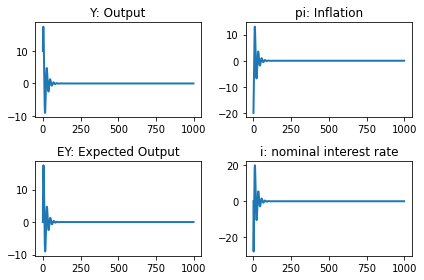

In [32]:
# 2

plt.subplot(2,2,1)
plt.plot([Y[t]*100 for t in range(N)], linewidth = 2)
plt.title('Y: Output')

plt.subplot(2,2,2)
plt.plot([pi[t]*100 for t in range(N)], linewidth = 2)
plt.title('pi: Inflation')

plt.subplot(2,2,3)
plt.plot([EY[t]*100 for t in range(N)], linewidth = 2)
plt.title('EY: Expected Output')

plt.subplot(2,2,4)
plt.plot([i[t]*100 for t in range(N)], linewidth = 2)
plt.title('i: nominal interest rate')

plt.tight_layout()

In [33]:
print('final output gap is: ', Y[N-1])
print('final inflation is: ', pi[N-1])

final output gap is:  1.231696496219241e-26
final inflation is:  1.5641396428161345e-26


In [35]:
# 3
A = np.array([[1, 0, 1/sigma], 
                [-kappa, 1, 0],
                [0, 0, 1]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 1.  ,  0.  , -0.5 ],
       [ 0.3 ,  1.  , -0.15],
       [ 0.  ,  0.  ,  1.  ]])

In [59]:
# 4
def func4(expec_vec):
    B = np.zeros(len(expec_vec))
    expY, expPi, expi = expec_vec
    
    B[0] = expY + 1/sigma * expPi
    B[1] = beta * expPi
    B[2] = phi_1 * expPi + phi_2 * expY
    
    z = np.dot(A_inv,B)
    return z

print([Y[N-1], pi[N-1], i[N-1]])
func4([Y[N-1], pi[N-1], i[N-1]])

[1.231696496219241e-26, 1.5641396428161345e-26, 2.1507955979595024e-26]


array([7.17491936e-27, 1.76374583e-26, 2.59254876e-26])

In [61]:
def func7(expec_vec):
    B = np.zeros(len(expec_vec))
    expY = expec_vec[0]
    expPi = expec_vec[1]
    
    B[0] = expY + 1/sigma * expPi
    B[1] = beta * expPi
    B[2] = phi_1 * expPi + phi_2 * expY
    
    z = np.dot(A_inv,B)
    diff = z - np.array(expec_vec)
    
    return diff

func7([Y[N-1], pi[N-1], i[N-1]])

array([-5.14204560e-27,  1.99606184e-27,  4.41753166e-27])

In [69]:
# 8
init = [1,1,0]

[coefficients, inf, ier, msg] = fsolve(func7, init, full_output = True)
if ier != 1:
    print(msg)

print('coefficients: ', coefficients, 'ier: ', ier, 'message: ', msg)


coefficients:  [1.5e-323 1.5e-323 2.5e-323] ier:  1 message:  The solution converged.


# Bonus Assignment

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# parameter specifications
sigma= 2
kappa=0.3
beta=0.99
phi_1=1.5
phi_2=0.2


A = np.array([[1, 0, 1/sigma], 
                [-kappa, 1, 0],
                [0, 0, 1]])
A_inv = np.linalg.inv(A)

#1

def shock_model1(expec_vec):
    B_shocked = np.zeros((3,2))
    B_ex = np.zeros((3,2)) # expected values

    expY = expec_vec[0]
    expPi = expec_vec[1]
    expi = expec_vec[2]


    e1 = expec_vec[3]
    e2 = expec_vec[4]
    e3 = expec_vec[5] #in c) it is 1

    # B as 3x2 matrix instead of 3x1
    # expected values, shocks with mean 0
    B_ex[0] = np.array([expY + 1/sigma * expPi, 0])
    B_ex[1] = np.array([beta * expPi, 0])
    B_ex[2] = np.array([phi_1 * expPi + phi_2 * expY, 0])
    # with realized shock
    B_shocked[0] = np.array([expY + 1/sigma * expPi, e1])
    B_shocked[1] = np.array([beta * expPi, e2])
    B_shocked[2] = np.array([phi_1 * expPi + phi_2 * expY, e3])

    C_ex = np.dot(A_inv,B_ex)
    C_shocked = np.dot(A_inv,B_shocked)
    diff = C_ex - C_shocked
    diff = diff.reshape(6,)
    return diff

#2
init = [1,0,1,1,0,0]
[coefficients, inf, ier, msg] = fsolve(shock_model1, init, full_output = True)
print(coefficients,msg)

#3 
init3 = [1,0,1,1,0,1]
[coefficients3, inf, ier, msg3] = fsolve(shock_model1, init, full_output = True)
print(coefficients3,msg3)

[1.00000000e+000 8.37331111e+140 1.00000000e+000 6.47714102e-175
 4.59932697e-184 1.29542820e-174] The solution converged.
[1.00000000e+000 8.37331111e+140 1.00000000e+000 6.47714102e-175
 4.59932697e-184 1.29542820e-174] The solution converged.
